<a href="https://colab.research.google.com/github/tanweer-mahdi/Approximate-Message-Passing/blob/master/rdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import json
!pip install catboost
import catboost
import xgboost
from collections import Counter
from catboost import CatBoostRegressor
import sklearn

     |████████████████████████████████| 69.2MB 56kB/s 


In [ ]:
from google.colab import files
files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv
Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [ ]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [ ]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
ef = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
dataset = pd.concat([df,ef], axis = 1)

In [ ]:
dataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew'],
      dtype='object')

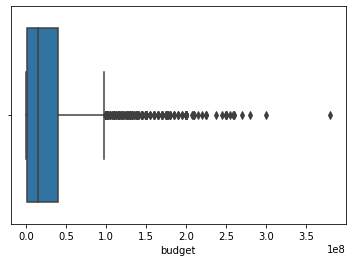

In [ ]:
sns.boxplot(x=dataset['budget'])

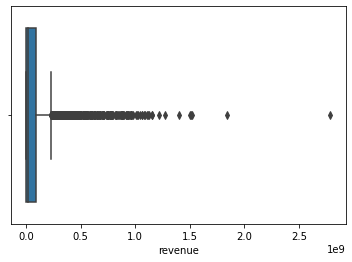

In [ ]:
sns.boxplot(x=dataset['revenue'])

In [ ]:
dataset.describe(include='all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title,cast,crew
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000,4803.000000,4803,4803,4803
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN,NaN,4800,4761,4776
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Batman,Five medical students want to find out if ther...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN,NaN,The Host,[],[]
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN,NaN,2,43,28
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989,57165.484281,NaN,NaN,NaN
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891,88694.614033,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,NaN,NaN,NaN
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000,9014.500000,NaN,NaN,NaN
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000,14629.000000,NaN,NaN,NaN
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000,58610.500000,NaN,NaN,NaN


In [ ]:
# removing zero revenues

In [ ]:
rdataset = dataset.loc[dataset["revenue"] != 0, :]

In [ ]:
# replacing the missing budget with average

In [ ]:
rdataset['budget'] = rdataset['budget'].replace(0, np.NaN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rdataset['budget'] = rdataset['budget'].replace(np.NaN, rdataset['budget'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rdataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew'],
      dtype='object')

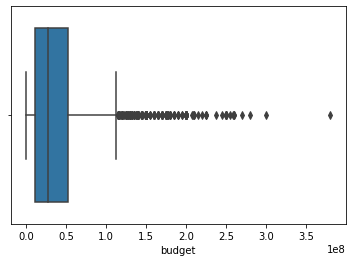

In [ ]:
sns.boxplot(x = rdataset["budget"])

In [ ]:
print("lel")

lel


In [ ]:
rdataset.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,3.376000e+03,3376.000000,3376.000000,3.376000e+03,3376.000000,3376.000000,3376.000000,3376.000000
mean,4.065444e+07,45518.799171,28.260492,1.170314e+08,110.382109,6.308738,944.422690,45518.799171
std,4.341912e+07,74725.406344,35.622362,1.834831e+08,21.116082,0.882279,1392.846418,74725.406344
min,1.000000e+00,5.000000,0.019984,5.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,1.100000e+07,5538.250000,9.957286,1.535290e+07,96.000000,5.800000,160.750000,5538.250000
50%,2.800000e+07,11581.500000,19.755221,5.175184e+07,106.000000,6.300000,440.500000,11581.500000
75%,5.200000e+07,47370.750000,36.425937,1.401651e+08,121.000000,6.900000,1091.250000,47370.750000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,417859.000000


In [ ]:
rdataset = rdataset.loc[rdataset["runtime"]>0,:]

In [ ]:
rdataset["id"]

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4775     33693
4788       692
4792     36095
4796     14337
4798      9367
Name: id, Length: 3375, dtype: int64

In [ ]:
wont_help = []
wont_help.append("id")

In [ ]:
rdataset.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,3.375000e+03,3375.000000,3375.000000,3.375000e+03,3375.000000,3375.000000,3375.000000,3375.000000
mean,4.065444e+07,45512.592000,28.268826,1.170653e+08,110.414815,6.309333,944.701333,45512.592000
std,4.342555e+07,74735.608756,35.624349,1.834997e+08,21.033516,0.881731,1392.958700,74735.608756
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,0.000000,0.000000,5.000000
25%,1.100000e+07,5526.500000,9.967348,1.536924e+07,96.000000,5.800000,161.000000,5526.500000
50%,2.800000e+07,11577.000000,19.760383,5.180119e+07,106.000000,6.300000,441.000000,11577.000000
75%,5.200000e+07,47207.500000,36.428157,1.401684e+08,121.000000,6.900000,1091.500000,47207.500000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,417859.000000


In [ ]:
wont_help.append("movie_id")

In [ ]:
wont_help

['id', 'movie_id']

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew'],
      dtype='object')

In [ ]:
genres = []
for i in rdataset["genres"]:
    temp = json.loads(i)
    for j in temp:
        if j["name"] not in genres:
            genres.append(j["name"])

In [ ]:
genres

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign']

In [ ]:
def num_genres(x):
    # x is a json
    temp = json.loads(x)
    return len(temp)

In [ ]:
num_genres(rdataset["genres"].iloc[0])

4

In [ ]:
for i in genres:
    rdataset[i] = 0

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew', 'Action',
       'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller',
       'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror',
       'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign'],
      dtype='object')

In [ ]:
rdataset["num_genres"] = 0

In [ ]:
rdataset["num_genres"] = rdataset["genres"].apply(num_genres)

In [ ]:
rdataset["num_genres"]

0       4
1       3
2       3
3       4
4       3
       ..
4775    2
4788    3
4792    4
4796    3
4798    3
Name: num_genres, Length: 3375, dtype: int64

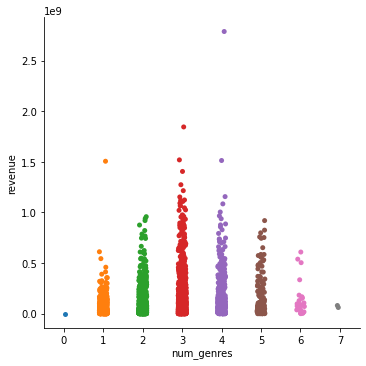

In [ ]:
sns.catplot(x="num_genres", y = "revenue", data = rdataset)

In [ ]:
for i in genres:
    rdataset[i] = rdataset["genres"].apply(lambda x: 1 if i in x else 0)

In [ ]:
rdataset["genres"].dtype

dtype('O')

In [ ]:
# rdataset["genres"] is not a string

In [ ]:
def findgenre(x,i):
    # x is the json
    # i is the feature to be found
    temp = json.loads(x)
    for j in temp:
        if j["name"] == i: return 1
    else:
        return 0

In [ ]:
rdataset["Action"] = rdataset["genres"].apply(lambda x: findgenre(x,"Action"))

In [ ]:
for i in genres:
    rdataset[i] = rdataset["genres"].apply(lambda x: findgenre(x,i))

In [ ]:
pass

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew', 'Action',
       'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller',
       'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror',
       'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign',
       'num_genres'],
      dtype='object')

In [ ]:
rdataset["has_homepage"] = 1

In [ ]:
rdataset.loc[rdataset["homepage"].isnull(),"has_homepage"] = 0

In [ ]:
rdataset

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title,cast,crew,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,num_genres,has_homepage
0,2.370000e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
1,3.000000e+08,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
2,2.450000e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
3,2.500000e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,1
4,2.600000e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,.

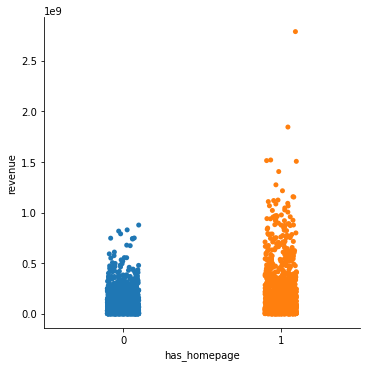

In [ ]:
sns.catplot(x="has_homepage", y ="revenue", data=rdataset)

In [ ]:
rdataset = rdataset.drop(["id","movie_id","homepage"], axis = 1)

In [ ]:
all_keywords = []
for i in rdataset["keywords"]:
    temp = json.loads(i)
    for j in temp:
        if j["name"] not in all_keywords:
            all_keywords.append(j["name"])

In [ ]:
len(all_keywords)

8828

In [ ]:
# won't work with keywords

In [ ]:
rdataset = rdataset.drop("keywords", axis = 1)

In [ ]:
rdataset["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'hi', 'ko', 'te', 'ru', 'de', 'cn', 'es',
       'it', 'nl', 'th', 'da', 'xx', 'is', 'nb', 'pt', 'af', 'pl', 'he',
       'vi', 'id', 'ro', 'no', 'el', 'fa'], dtype=object)

In [ ]:
rdataset["original_language"].describe(include='all')

count     3375
unique      28
top         en
freq      3232
Name: original_language, dtype: object

In [ ]:
from collections import Counter

In [ ]:
all_lan = Counter(rdataset["original_language"].values.tolist())

In [ ]:
from collections import Counter

In [ ]:
temp = list(zip(list(all_lan.keys()),list(all_lan.values())))

In [ ]:
temp.sort(key = lambda x: x[1], reverse = True)

In [ ]:
temp[:3]

[('en', 3232), ('fr', 28), ('es', 18)]

In [ ]:
top_3_lan = [x for x,_ in temp[:3]]

In [ ]:
top_3_lan

['en', 'fr', 'es']

In [ ]:
rdataset["original_language"] =rdataset["original_language"].apply(lambda x: x if x in top_3_lan else "other")

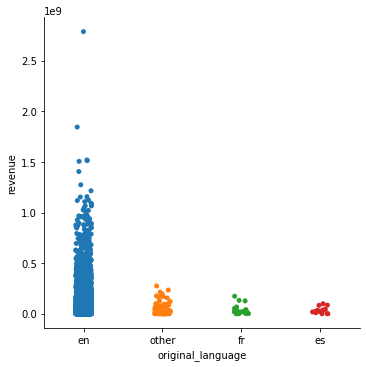

In [ ]:
sns.catplot(x='original_language', y = 'revenue', data = rdataset)

In [ ]:
rdataset = rdataset.drop("original_title", axis=1)

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'title', 'cast', 'crew', 'Action',
       'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller',
       'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror',
       'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign',
       'num_genres', 'has_homepage'],
      dtype='object')

In [ ]:
rdataset = rdataset.drop(["overview", "popularity"], axis = 1)

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage'],
      dtype='object')

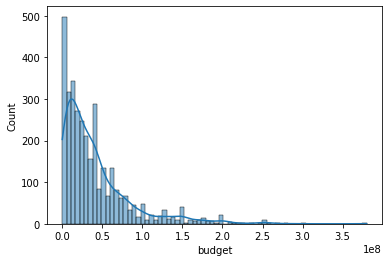

In [ ]:
sns.histplot(rdataset["budget"], kde=True)

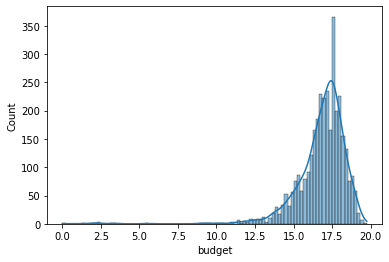

In [ ]:
sns.histplot(np.log(rdataset["budget"]), kde=True)

In [ ]:
rdataset["production_companies"]

0       [{"name": "Ingenious Film Partners", "id": 289...
1       [{"name": "Walt Disney Pictures", "id": 2}, {"...
2       [{"name": "Columbia Pictures", "id": 5}, {"nam...
3       [{"name": "Legendary Pictures", "id": 923}, {"...
4             [{"name": "Walt Disney Pictures", "id": 2}]
                              ...                        
4775                                                   []
4788       [{"name": "Dreamland Productions", "id": 407}]
4792               [{"name": "Daiei Studios", "id": 881}]
4796                   [{"name": "Thinkfilm", "id": 446}]
4798             [{"name": "Columbia Pictures", "id": 5}]
Name: production_companies, Length: 3375, dtype: object

In [ ]:
dataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew'],
      dtype='object')

In [ ]:
import datetime 

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage'],
      dtype='object')

In [ ]:
rdataset["production_companies"][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [ ]:
all_prod = []
for i in rdataset["production_companies"]:
    temp = json.loads(i)
    for j in temp:
        all_prod.append(j["name"])

In [ ]:
len(all_prod)

10736

In [ ]:
Counter(all_prod).most_common(20)

[('Warner Bros.', 285),
 ('Universal Pictures', 276),
 ('Paramount Pictures', 251),
 ('Twentieth Century Fox Film Corporation', 205),
 ('Columbia Pictures', 168),
 ('New Line Cinema', 144),
 ('Walt Disney Pictures', 100),
 ('Relativity Media', 100),
 ('Metro-Goldwyn-Mayer (MGM)', 96),
 ('Touchstone Pictures', 95),
 ('Columbia Pictures Corporation', 87),
 ('Village Roadshow Pictures', 74),
 ('DreamWorks SKG', 67),
 ('Miramax Films', 67),
 ('United Artists', 65),
 ('Regency Enterprises', 62),
 ('Dune Entertainment', 56),
 ('Canal+', 51),
 ('TriStar Pictures', 50),
 ('Lionsgate', 49)]

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage'],
      dtype='object')

In [ ]:
dataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew'],
      dtype='object')

In [ ]:
# make a list of production houses that his high revenues

In [ ]:
high_profit_prod = []

In [ ]:
high_profit = rdataset.loc[rdataset["revenue"]>5e7, "production_companies"]

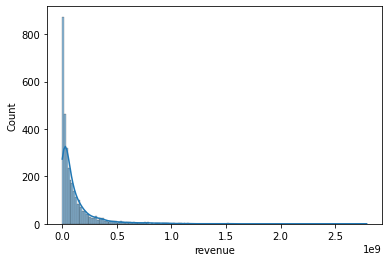

In [ ]:
sns.histplot(rdataset["revenue"], kde = True)

In [ ]:
high_profit.count()

1717

In [ ]:
all_prod = []
for i in high_profit:
    temp = json.loads(i)
    for j in temp:
        all_prod.append(j["name"])

In [ ]:
len(all_prod)

5918

In [ ]:
top_prod = [x for x,_ in Counter(all_prod).most_common(30)] # This 30 production house frequently make movies those make above 50 million dollars!

In [ ]:
top_prod

['Universal Pictures',
 'Warner Bros.',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Walt Disney Pictures',
 'Relativity Media',
 'Village Roadshow Pictures',
 'Touchstone Pictures',
 'DreamWorks SKG',
 'Columbia Pictures Corporation',
 'Metro-Goldwyn-Mayer (MGM)',
 'Amblin Entertainment',
 'Dune Entertainment',
 'Regency Enterprises',
 'Fox 2000 Pictures',
 'Working Title Films',
 'DreamWorks Animation',
 'Miramax Films',
 'Legendary Pictures',
 'Spyglass Entertainment',
 'TriStar Pictures',
 'Original Film',
 'Lionsgate',
 'Summit Entertainment',
 'United Artists',
 'TSG Entertainment',
 'New Regency Pictures',
 'Scott Rudin Productions']

In [ ]:
def findprod(x,i):
    temp = json.loads(x)
    for j in temp:
        if j["name"] == i:
            return 1
    else:
        return 0
    

In [ ]:
for i in top_prod:
    rdataset[i] = 0
    rdataset[i] = rdataset["production_companies"].apply(lambda x: findprod(x,i))

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage',
       'Universal Pictures', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'New Line Cinema', 'Walt Disney Pictures', 'Relativity Media',
       'Village Roadshow Pictures', 'Touchstone Pictures', 'DreamWorks SKG',
       'Columbia Pictures Corporation', 'Metro-Goldwyn-Mayer (MGM)',
       'Amblin Entertainment', 'Dune Entertainment', 'Regency Enterprises',
       'Fox 2000 Pictures', 'Working Title Films

In [ ]:
rdataset["production_companies"][19]

'[{"name": "WingNut Films", "id": 11}, {"name": "New Line Cinema", "id": 12}, {"name": "Warner Bros. Pictures", "id": 174}, {"name": "3Foot7", "id": 7413}, {"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}]'

In [ ]:
rdataset["Twentieth Century Fox Film Corporation"][19]

0

In [ ]:
rdataset.iloc[1234,:]

budget                                                               3.8e+07
genres                     [{"id": 18, "name": "Drama"}, {"id": 28, "name...
original_language                                                         en
production_companies       [{"name": "Revolution Films", "id": 163}, {"na...
production_countries       [{"iso_3166_1": "DE", "name": "Germany"}, {"is...
                                                 ...                        
Summit Entertainment                                                       0
United Artists                                                             0
TSG Entertainment                                                          0
New Regency Pictures                                                       0
Scott Rudin Productions                                                    0
Name: 1332, Length: 68, dtype: object

In [ ]:
Counter(all_prod).most_common(30)

[('Universal Pictures', 194),
 ('Warner Bros.', 193),
 ('Paramount Pictures', 165),
 ('Twentieth Century Fox Film Corporation', 142),
 ('Columbia Pictures', 125),
 ('New Line Cinema', 85),
 ('Walt Disney Pictures', 83),
 ('Relativity Media', 72),
 ('Village Roadshow Pictures', 60),
 ('Touchstone Pictures', 60),
 ('DreamWorks SKG', 57),
 ('Columbia Pictures Corporation', 54),
 ('Metro-Goldwyn-Mayer (MGM)', 47),
 ('Amblin Entertainment', 46),
 ('Dune Entertainment', 45),
 ('Regency Enterprises', 45),
 ('Fox 2000 Pictures', 35),
 ('Working Title Films', 31),
 ('DreamWorks Animation', 30),
 ('Miramax Films', 29),
 ('Legendary Pictures', 28),
 ('Spyglass Entertainment', 26),
 ('TriStar Pictures', 26),
 ('Original Film', 25),
 ('Lionsgate', 25),
 ('Summit Entertainment', 25),
 ('United Artists', 25),
 ('TSG Entertainment', 24),
 ('New Regency Pictures', 24),
 ('Scott Rudin Productions', 24)]

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage',
       'Universal Pictures', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'New Line Cinema', 'Walt Disney Pictures', 'Relativity Media',
       'Village Roadshow Pictures', 'Touchstone Pictures', 'DreamWorks SKG',
       'Columbia Pictures Corporation', 'Metro-Goldwyn-Mayer (MGM)',
       'Amblin Entertainment', 'Dune Entertainment', 'Regency Enterprises',
       'Fox 2000 Pictures', 'Working Title Films

In [ ]:
rdataset["release_date"]

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4775    2002-09-20
4788    1972-03-12
4792    1997-11-06
4796    2004-10-08
4798    1992-09-04
Name: release_date, Length: 3375, dtype: object

In [ ]:
rdataset["release_date"] = pd.to_datetime(rdataset["release_date"])

In [ ]:
rdataset["release_year"] = pd.DatetimeIndex(rdataset['release_date']).year

In [ ]:
rdataset["release_month"] = pd.DatetimeIndex(rdataset['release_date']).month

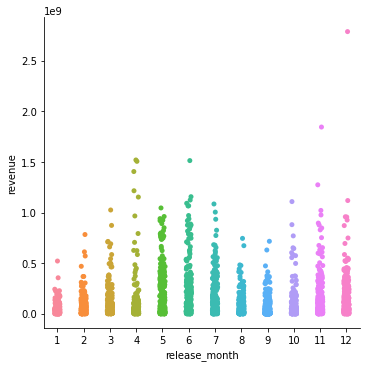

In [ ]:
sns.catplot(x="release_month", y="revenue", data=rdataset)

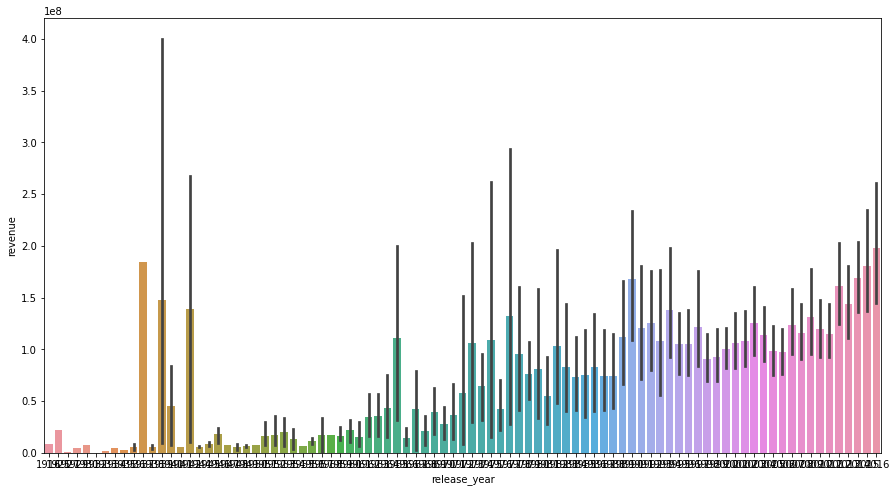

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="release_year", y="revenue", data=rdataset)

In [ ]:
rdataset["release_weekday"] = pd.DatetimeIndex(rdataset["release_date"]).weekday

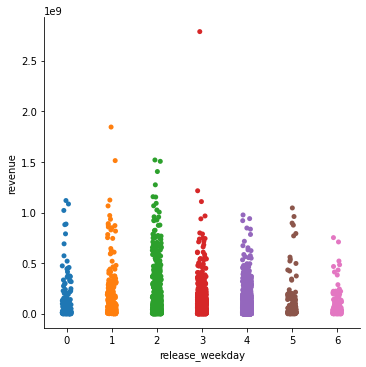

In [ ]:
sns.catplot(x="release_weekday", y="revenue", data = rdataset)

In [ ]:
rdataset[["release_year", "release_month", "release_weekday"]]

,release_year,release_month,release_weekday
0,2009,12,3
1,2007,5,5
2,2015,10,0
3,2012,7,0
4,2012,3,2
...,...,...,...
4775,2002,9,4
4788,1972,3,6
4792,1997,11,3
4796,2004,10,4


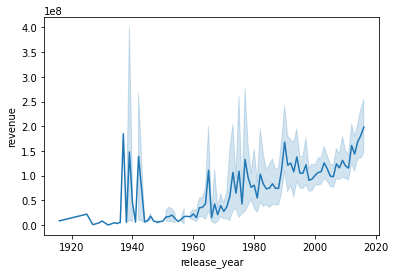

In [ ]:
sns.lineplot(x="release_year", y= "revenue", data=rdataset)

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage',
       'Universal Pictures', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'New Line Cinema', 'Walt Disney Pictures', 'Relativity Media',
       'Village Roadshow Pictures', 'Touchstone Pictures', 'DreamWorks SKG',
       'Columbia Pictures Corporation', 'Metro-Goldwyn-Mayer (MGM)',
       'Amblin Entertainment', 'Dune Entertainment', 'Regency Enterprises',
       'Fox 2000 Pictures', 'Working Title Films

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage',
       'Universal Pictures', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'New Line Cinema', 'Walt Disney Pictures', 'Relativity Media',
       'Village Roadshow Pictures', 'Touchstone Pictures', 'DreamWorks SKG',
       'Columbia Pictures Corporation', 'Metro-Goldwyn-Mayer (MGM)',
       'Amblin Entertainment', 'Dune Entertainment', 'Regency Enterprises',
       'Fox 2000 Pictures', 'Working Title Films

In [ ]:
rdataset.columns

Index(['budget', 'genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew', 'Action', 'Adventure', 'Fantasy',
       'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family',
       'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War',
       'Music', 'Documentary', 'Foreign', 'num_genres', 'has_homepage',
       'Universal Pictures', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'New Line Cinema', 'Walt Disney Pictures', 'Relativity Media',
       'Village Roadshow Pictures', 'Touchstone Pictures', 'DreamWorks SKG',
       'Columbia Pictures Corporation', 'Metro-Goldwyn-Mayer (MGM)',
       'Amblin Entertainment', 'Dune Entertainment', 'Regency Enterprises',
       'Fox 2000 Pictures', 'Working Title Films

In [ ]:
from catboost import Pool

In [ ]:
features = rdataset[["budget","original_language", "runtime", "Action", "Adventure", "Fantasy", "Science Fiction", "Crime", "Drama", "Thriller",
           "Animation", "Family", "Western", "Comedy", "Romance", "Horror", "Mystery", "History", "War", "Music", "Documentary",
           "Foreign", "num_genres", "has_homepage", "release_year", "release_month", "release_weekday"]]

In [ ]:
labels = rdataset["revenue"]

In [ ]:
categorical_features = ["original_language", "has_homepage", "release_month", "release_weekday"]

In [ ]:
pool = Pool(data=features, label=labels, cat_features=categorical_features)

In [ ]:
model = CatBoostRegressor(iterations=1000,
                        learning_rate=0.005,
                        depth=8,
                        l2_leaf_reg=None,
                        model_size_reg=None,
                        loss_function='RMSE')

In [ ]:
model.fit(pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 183065984.4954236	total: 61ms	remaining: 1m
1:	learn: 182637042.4605094	total: 74.7ms	remaining: 37.3s
2:	learn: 182207859.7070808	total: 86ms	remaining: 28.6s
3:	learn: 181779196.9668917	total: 93.3ms	remaining: 23.2s
4:	learn: 181338799.9812402	total: 101ms	remaining: 20s
5:	learn: 180910949.0950840	total: 112ms	remaining: 18.5s
6:	learn: 180497501.9679906	total: 117ms	remaining: 16.6s
7:	learn: 180091908.0814514	total: 130ms	remaining: 16.1s
8:	learn: 179670736.1856921	total: 141ms	remaining: 15.5s
9:	learn: 179285882.8118502	total: 152ms	remaining: 15.1s
10:	learn: 178900819.0083021	total: 163ms	remaining: 14.7s
11:	learn: 178478874.8987073	total: 174ms	remaining: 14.3s
12:	learn: 178073276.5347034	total: 185ms	remaining: 14.1s
13:	learn: 177722508.2152754	total: 196ms	remaining: 13.8s
14:	learn: 177316558.6821029	total: 207ms	remaining: 13.6s
15:	learn: 176915617.3219428	total: 212ms	remaining: 13s
16:	learn: 176526544.1336310	total: 223ms	remaining: 12.9s
17:	learn: 176

In [ ]:
params = {"learning_rate": 0.005,
         "depth" : 8,
         "loss_function" : "RMSE"}

In [ ]:
from catboost import cv

In [ ]:
scores = cv(pool,
            params,
            fold_count=10, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 216976748.7408208	test: 215988942.8430600	best: 215988942.8430600 (0)
1:	learn: 216347016.3756224	test: 215373911.6818658	best: 215373911.6818658 (1)
2:	learn: 215696730.9068972	test: 214734932.0862403	best: 214734932.0862403 (2)
3:	learn: 215082808.3625314	test: 214141972.8934205	best: 214141972.8934205 (3)
4:	learn: 214462305.7044602	test: 213554506.8853059	best: 213554506.8853059 (4)
5:	learn: 213848563.9717941	test: 212951416.8715362	best: 212951416.8715362 (5)
6:	learn: 213251176.0274603	test: 212375061.4158545	best: 212375061.4158545 (6)
7:	learn: 212654444.1795103	test: 211792950.0053291	best: 211792950.0053291 (7)
8:	learn: 212043348.5210940	test: 211185604.9878268	best: 211185604.9878268 (8)
9:	learn: 211450620.4977066	test: 210614674.8376762	best: 210614674.8376762 (9)
10:	learn: 210852021.9784898	test: 210031864.8411360	best: 210031864.8411360 (10)
11:	learn: 210259401.7348227	test: 209445620.2126057	best: 209445620.2126057 (11)
12:	learn: 209658024.0098773	test: 2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
rdataset.tail(5)

,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title,cast,crew,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,num_genres,has_homepage,Universal Pictures,Warner Bros.,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures,New Line Cinema,Walt Disney Pictures,Relativity Media,Village Roadshow Pictures,Touchstone Pictures,DreamWorks SKG,Columbia Pictures Corporation,Metro-Goldwyn-Mayer (MGM),Amblin Entertainment,Dune Entertainment,Regency Enterprises,Fox 2000 Pictures,Working Title Films,DreamWorks Animation,Miramax Films,Legendary Pictures,Spyglass Entertainment,TriStar Pictures,Original Film,Lionsgate,Summit Entertainment,United Artists,TSG Entertainment,New Regency Pictures,Scott Rudin Productions,release_year,release_month,release_weekday
4775,4.065444e+07,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",en,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-09-20,76901,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Funny Ha Ha,6.3,8,Funny Ha Ha,"[{""cast_id"": 1, ""character"": ""Marnie"", ""credit...","[{""credit_id"": ""52fe45309251416c9102a535"", ""de...",0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2002,9,4
4788,1.200000e+04,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",en,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,Pink Flamingos,"[{""cast_id"": 8, ""character"": ""Divine / Babs Jo...","[{""credit_id"": ""52fe426bc3a36847f801d203"", ""de...",0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1972,3,6
4792,2.000000e+04,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",other,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63,Cure,"[{""cast_id"": 3, ""character"": ""Kenichi Takabe"",...","[{""credit_id"": ""52fe45cc9251416c9103eb7b"", ""de...",0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1997,11,3
4796,7.000000e+03,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",en,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What happens if it actually works?,Primer,6.9,658,Primer,"[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_...","[{""credit_id"": ""52fe45e79251416c75066791"", ""de...",0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,10,4
4798,2.200000e+05,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1992,9,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1)

In [ ]:
X_test.shape

(338, 27)

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)

In [ ]:
params

{'depth': 8, 'learning_rate': 0.005, 'loss_function': 'RMSE'}

In [ ]:
test_pool = Pool(data=X_test, label = y_test, cat_features=categorical_features)

In [ ]:
model = CatBoostRegressor(params)

In [ ]:
model.fit(pool, plot=True)

CatBoostError: ignored

In [ ]:
params

{'depth': 8, 'learning_rate': 0.005, 'loss_function': 'RMSE'}

In [ ]:
params['iterations'] = 1000

In [ ]:
params

{'depth': 8,
 'iterations': 1000,
 'learning_rate': 0.005,
 'loss_function': 'RMSE'}

In [ ]:
model = CatBoostRegressor(iterations=1000,
                        learning_rate=0.005,
                        depth=8,
                        l2_leaf_reg=None,
                        model_size_reg=None,
                        loss_function='RMSE')

In [ ]:
model.fit(pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 186186487.7429956	total: 15.1ms	remaining: 15s
1:	learn: 185744938.5465047	total: 35.4ms	remaining: 17.7s
2:	learn: 185309558.7266452	total: 46.8ms	remaining: 15.5s
3:	learn: 184862137.3912230	total: 57.8ms	remaining: 14.4s
4:	learn: 184451817.5374932	total: 68.9ms	remaining: 13.7s
5:	learn: 184041947.3641605	total: 79.8ms	remaining: 13.2s
6:	learn: 183628867.9468521	total: 90.9ms	remaining: 12.9s
7:	learn: 183219992.4951256	total: 102ms	remaining: 12.6s
8:	learn: 182792175.1753175	total: 112ms	remaining: 12.4s
9:	learn: 182436685.0707952	total: 123ms	remaining: 12.2s
10:	learn: 182074232.2344899	total: 133ms	remaining: 12s
11:	learn: 181674236.2702509	total: 140ms	remaining: 11.5s
12:	learn: 181284454.7444834	total: 142ms	remaining: 10.8s
13:	learn: 180888561.3172650	total: 146ms	remaining: 10.3s
14:	learn: 180478403.2389975	total: 156ms	remaining: 10.3s
15:	learn: 180098376.8573115	total: 167ms	remaining: 10.3s
16:	learn: 179694983.7821558	total: 177ms	remaining: 10.2s
17:	

In [ ]:
!pip3 install ipywidgets

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred = model.predict(test_pool)

In [ ]:
score = r2_score(y_test, y_pred)

In [ ]:
score

0.6457547326645445